In [1]:
import cv2, math, numpy as np
from math import sqrt,exp,pi
from numpy import linalg as LA,dot,zeros,copy, log10,array,amax,dstack, append,argmax
import matplotlib.pyplot as plt
import time                                                

def timeme(method):
    def wrapper(*args, **kw):
        startTime = int(round(time.time()))
        result = method(*args, **kw)
        endTime = int(round(time.time()))

        print(endTime - startTime,'s')
        return result

    return wrapper

In [2]:
image = cv2.imread("./images/task_1.jpg")
I = len(image);J = len(image[0]);
print(I,'x',J)

850 x 1332


In [3]:
img = cv2.imread("./images/task_1.jpg", cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
width = 800
height = 800
dim = (width, height)
 
# resize image
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',image.shape)

Original Dimensions :  (850, 1332, 3)
Resized Dimensions :  (800, 800, 3)


800 x 800


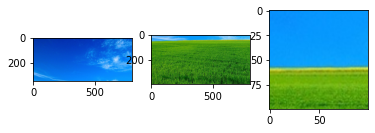

100 x 100


In [4]:
I = len(image);J = len(image[0]);
print(I,'x',J)
y=J//2;h=50; y1=int(350);y2=int(400)
crop_im1 = image[:y1]
crop_im2 = image[y2:]
image = image[J//2-h+40:J//2+h+40, I//2-h:I//2+h]
fig, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(crop_im1, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(crop_im2, cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
I = len(image);J = len(image[0]);
print(I,'x',J)

In [5]:
def M_σ(image):
  #image = cv2.imread(path)
  mas = array(image[0])
  for i in range(1,len(image)):
    np.vstack((mas,image[i]))
  image_n = mas
  mean = np.mean(image_n,axis=0); sigma=np.var(image_n,axis=0); cov = np.cov(mas,rowvar=False)
  print('DATA','\n','M = ',mean,'\n','σ = ',sigma,'\n', 'cov = ','\n',cov)
  return [mean,cov],image


#path1="./images/1class.jpg";path2="./images/2class.jpg";
data1,image1 = M_σ(crop_im1);data2,image2 = M_σ(crop_im2)

DATA 
 M =  [179.98125  59.8075    5.27875] 
 σ =  [373.90839844 676.51294375  93.08604844] 
 cov =  
 [[374.3763689  472.82241865 119.3857087 ]
 [472.82241865 677.3596433  183.11630476]
 [119.3857087  183.11630476  93.20255163]]
DATA 
 M =  [251.9775 177.585   67.525 ] 
 σ =  [   7.29699375  803.210275   5572.409375  ] 
 cov =  
 [[   7.30612641   -8.8679224   -31.05700876]
 [  -8.8679224   804.21554443 2062.05669587]
 [ -31.05700876 2062.05669587 5579.38360451]]


In [6]:
def p (x,data):
  return 1/(sqrt(LA.det(data[1]))*sqrt(2*pi)**len(x))*exp(-1/2*dot(dot((x-data[0]).T,LA.inv(data[1])),(x-data[0])))

print('P_11=',p(image1[0][0],data1),'P_12=',p(image1[0][0],data2),' | ','P_21=',p(image2[0][0],data1),'P_22=',p(image2[0][0],data2))
print(image1[0][0],data1)

P_11= 3.84318311321649e-05 P_12= 5.8170747382091115e-263  |  P_21= 6.324604634316944e-185 P_22= 9.094937378675975e-07
[166  46   4] [array([179.98125,  59.8075 ,   5.27875]), array([[374.3763689 , 472.82241865, 119.3857087 ],
       [472.82241865, 677.3596433 , 183.11630476],
       [119.3857087 , 183.11630476,  93.20255163]])]


In [7]:
def k (x):
  p1 = p(x,data1); p2 = p(x,data2)
  if p1 > p2: return 1,p1,p1,p2
  else: return 2,p2,p1,p2

print ('K1 = ',k(image1[0][0]),'K2 = ',k(image2[0][0]))

K1 =  (1, 3.84318311321649e-05, 3.84318311321649e-05, 5.8170747382091115e-263) K2 =  (2, 9.094937378675975e-07, 6.324604634316944e-185, 9.094937378675975e-07)


In [8]:
def k_p(image):
    mas_k = zeros((I,J));mas_p = zeros((I,J));mas_p1 = zeros((I,J));mas_p2 = zeros((I,J))
    for i in range(I):
      for j in range(J):
        k_im,p_im,p_im1,p_im2 = k(image[i][j]);mas_k[i][j] = k_im; mas_p[i][j] = p_im;mas_p1[i][j] = p_im1;mas_p2[i][j] = p_im2
    return mas_k,mas_p,mas_p1,mas_p2

mas_k,mas_p,mas_p1,mas_p2 = k_p(image)

In [9]:
def p_k1_k2(k1,k2):
    a = 0.2
    if k1 != k2:return a
    else: return 1-a

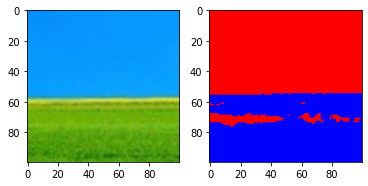

In [10]:
def r_b (image,mas_k):
#     new_image=np.zeros((I,J,3))
    new_image=copy(image)
    for i in range(I):
        for j in range(J):
            if mas_k[i][j]==1:new_image[i][j][0]=255;new_image[i][j][1]=0;new_image[i][j][2]=0
            else:new_image[i][j][0]=0;new_image[i][j][1]=0;new_image[i][j][2]=255;
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_img_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB) 
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(img_rgb)
    axes[1].imshow(new_img_rgb)
    plt.show()
r_b (image,mas_k)            

In [11]:
def inicialization_p():
    p_0=np.full((I,J,2), 0.5, dtype=float)
#     pk1=0.8
#     p1=np.full((I,J), pk1, dtype=float);p2=np.full((I,J), 1-pk1, dtype=float)
#     p_0 = dstack((p1,p2))
    return p_0
P=inicialization_p()

In [12]:
print(P[0,0,1])

0.5


In [13]:
p_k = dstack((mas_p1,mas_p2));# P = log10(P)

In [14]:
def a_k_f():
    a_k=np.empty((I,J,2))
    D = [data1,data2]
    for i in range(I):
        for j in range(J):
            for k in range(2):
                SUM = 0
                for k1 in range(2): 
                    SUM += P[i,j,k1]*p_k[i,j,k1]#p(image[i,j],D[k1])
                a_k[i,j,k]=P[i,j,k]*p_k[i,j,k]/SUM#p(image[i,j],D[k])
    return a_k
a_k = a_k_f()

C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/3014720872.py:10: RuntimeWarning: invalid value encountered in double_scalars
  a_k[i,j,k]=P[i,j,k]*p_k[i,j,k]/SUM#p(image[i,j],D[k])


In [15]:
def p_k_1_f():
    p_k_1=np.empty((I,J,2))
    for i in range(I):
        for j in range(J):
            L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
            for k in range(2):
                SUM = P[i,j,k]; N = 0
                for l in L:
                    a=l[0];b=l[1];
                    if a!=I and a!=-1 and b!=J and b!=-1:
                        SUM += p_k[a,b,k]; N += 1;
                p_k_1[i,j,k]=SUM/N;
    return p_k_1
p_k_1=p_k_1_f()

In [16]:
def a_k_1_f():
    a_k_1=np.empty((I,J,2))
    for i in range(I):
        for j in range(J):
            L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
            for k in range(2):
                SUM = a_k[i,j,k]*log10(p_k[i,j,k])
                for k1 in range(2): 
                    m=[]
                    for l in L:
                        a=l[0];b=l[1];
                        if a!=I and a!=-1 and b!=J and b!=-1:
                            SUM += a_k[a,b,k]*log10(p_k[a,b,k1])
                        m=append(m,SUM);
                    a_k_1[i,j,k]=amax(m);
                    
    return a_k_1
a_k_1=a_k_1_f()

C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:13: RuntimeWarning: divide by zero encountered in log10
  SUM += a_k[a,b,k]*log10(p_k[a,b,k1])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:13: RuntimeWarning: invalid value encountered in double_scalars
  SUM += a_k[a,b,k]*log10(p_k[a,b,k1])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:7: RuntimeWarning: divide by zero encountered in log10
  SUM = a_k[i,j,k]*log10(p_k[i,j,k])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:7: RuntimeWarning: invalid value encountered in double_scalars
  SUM = a_k[i,j,k]*log10(p_k[i,j,k])


Розмітка на початку


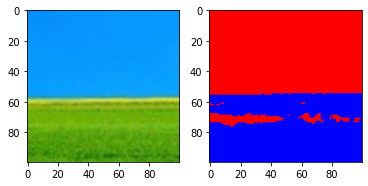

C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/3014720872.py:10: RuntimeWarning: invalid value encountered in double_scalars
  a_k[i,j,k]=P[i,j,k]*p_k[i,j,k]/SUM#p(image[i,j],D[k])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:13: RuntimeWarning: divide by zero encountered in log10
  SUM += a_k[a,b,k]*log10(p_k[a,b,k1])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:13: RuntimeWarning: invalid value encountered in double_scalars
  SUM += a_k[a,b,k]*log10(p_k[a,b,k1])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:7: RuntimeWarning: divide by zero encountered in log10
  SUM = a_k[i,j,k]*log10(p_k[i,j,k])
C:\Users\Alex\AppData\Local\Temp/ipykernel_2068/2959378759.py:7: RuntimeWarning: invalid value encountered in double_scalars
  SUM = a_k[i,j,k]*log10(p_k[i,j,k])


0


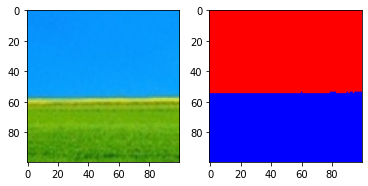

20


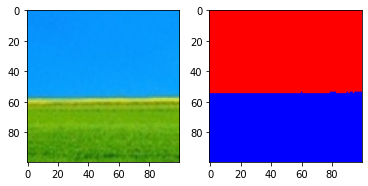

40


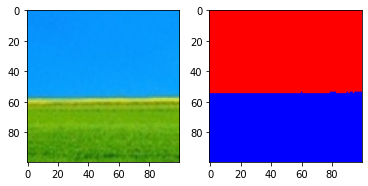

60


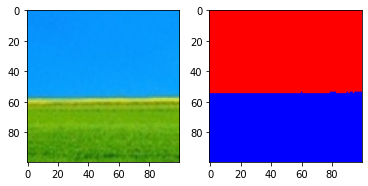

80


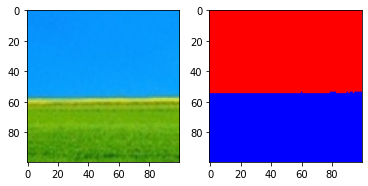

100


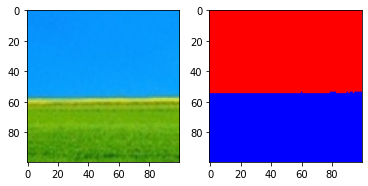

In [17]:
print("Розмітка на початку")
r_b (image,mas_k)
for k in range (101):
    a_k = a_k_f()
    p_k_1=p_k_1_f()
    a_k_1=a_k_1_f()  
    if float(k/20).is_integer():
        for i in range(I):
            for j in range(J):
                if a_k_1[i,j,0]>a_k_1[i,j,1]: mas_k[i,j]=0
                else: mas_k[i,j]=1
        print(k)
        r_b (image,mas_k) 